# Import all required Libraries

In [88]:
# Import_Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Load the Train Dataset

In [49]:
# 1. Load and clean dataset
data = pd.read_csv(r"C:\Users\ASUS\Downloads\train (1).csv")

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [51]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Cleaning 

In [52]:
# Drop The Null value 
data=data.dropna()

In [91]:
# Checking If null value is present or not 
data.isnull().sum() # Not a single Null value present

x    0
y    0
dtype: int64

<Axes: >

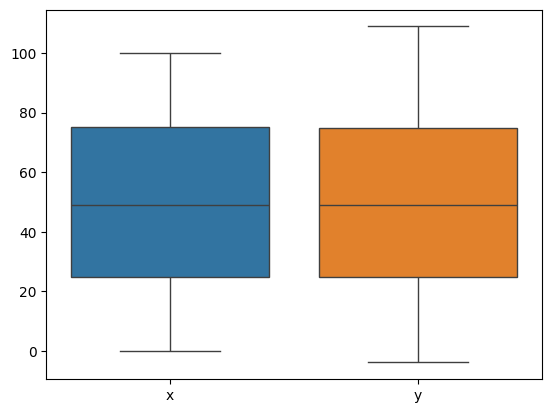

In [90]:
# Check Outliers 
sns.boxplot(data) # No Outlier Present 

# Separate the data into x_tran and y_train 

In [53]:
# Separate the data into x_tran and y_train 
X_train = data.iloc[:, :-1]
y_train = data['y']

# Pipeline Columns

In [92]:
# Make the pipelie col 1 Which is Rumove Null value with mean 
from sklearn.impute import SimpleImputer
trf1=ColumnTransformer(transformers=[('mean_imputer_x', SimpleImputer(strategy='mean'), [0])],remainder ='passthrough')

In [93]:
# Make the second column Which is Standard Scalar 
from sklearn.preprocessing import StandardScaler
trf2 = ColumnTransformer(transformers=[('x_Scaler', StandardScaler(), [0])],remainder='passthrough')

# Check which regression model Works 

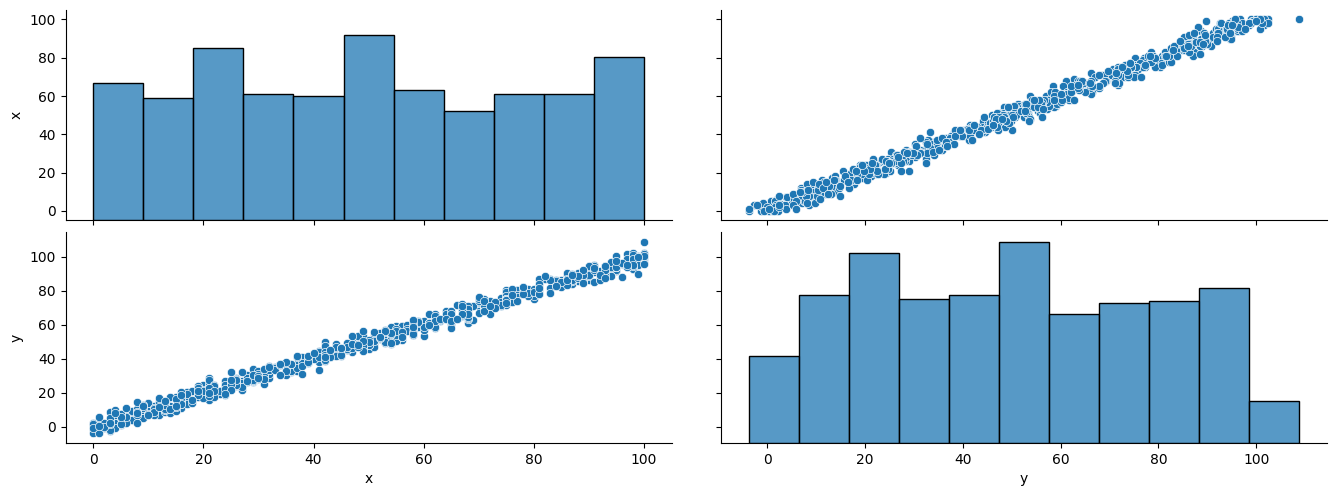

In [111]:
import matplotlib.pyplot as plt
g = sns.pairplot(data)
# Set the size of the underlying figure object
g.fig.set_size_inches(15, 5) # We can apply Linear Regression 

# Linear_Model

In [94]:
# Make the 3rd column of the pipeline which is the model
from sklearn.linear_model import LinearRegression
trf3=LinearRegression()

# Pipeline 

In [95]:
# Make the pipeline 
from sklearn.pipeline import Pipeline 
pipe = Pipeline([('Missing',trf1),       # First, handle missing values
    ('scaler', trf2),        # Second, scale the features
    ('regressor', trf3)      # Finally, apply the model
])

# Fitting of x_train and y_train inside the pipeline 

In [96]:
pipe.fit(X_train,y_train)

,steps,"[('Missing', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mean_imputer_x', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Import the testing Dataset

In [97]:
# Load The testing Data 
data2=pd.read_csv(r"C:\Users\ASUS\Downloads\test (1).csv")

# Split Dataset into x_test and y_test

In [98]:
# Split this into x_test and y_test
x_test=data2.iloc[:,:-1]
y_test=data2['y']

# Dataset Cleaning Process

In [114]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


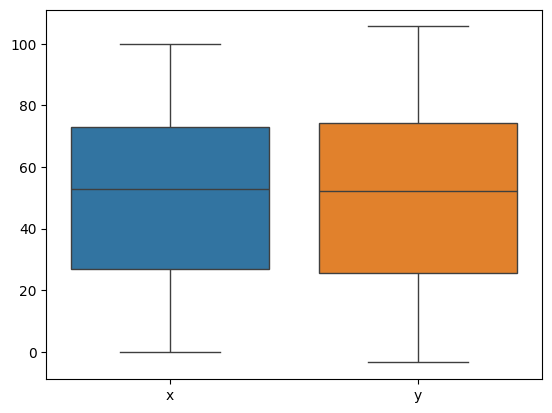

In [117]:
# Check Outliers 
h=sns.boxplot(data2) # Not Outliers are present 

# make the prediction 

In [99]:
y_pred=pipe.predict(x_test)
df1=(pd.DataFrame(y_pred,columns=["Predicted_Y"]))

In [100]:
df1

,Predicted_Y
0,76.943276
1,20.906519
2,21.907175
3,19.905862
4,35.916364
...,...
295,70.939338
296,45.922928
297,54.928836
298,61.933430


In [101]:
df1['y_test']=y_test

# Side by Side Comparision

In [102]:
# Side by Side Comparision
df1

,Predicted_Y,y_test
0,76.943276,79.775152
1,20.906519,23.177279
2,21.907175,25.609262
3,19.905862,17.857388
4,35.916364,41.849864
...,...,...
295,70.939338,68.545888
296,45.922928,47.334876
297,54.928836,54.090637
298,61.933430,63.297171


In [103]:
pipe.score(x_test,y_test)

0.9888014444327563